# Imports

In [1]:
#!/usr/bin/env python
# coding: utf-8
import os
import sys
import json
import time
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Load data

In [12]:
df = pd.read_csv("./Temp/data1.csv")
print(df.shape)
display(df.head(2))
display(df.tail(2))

(615891, 7)


,Unnamed: 0,Time,Open,High,Low,Close,Volume
0,0,2022-08-02 22:02:00,1761.724,1761.784,1761.208,1761.264,1
1,1,2022-08-02 22:03:00,1761.244,1761.754,1761.148,1761.438,1


,Unnamed: 0,Time,Open,High,Low,Close,Volume
615889,199998,2024-04-24 14:58:00,2329.174,2330.248,2328.725,2329.138,1
615890,199999,2024-04-24 14:59:00,2329.138,2329.595,2328.715,2329.578,1


# show data 

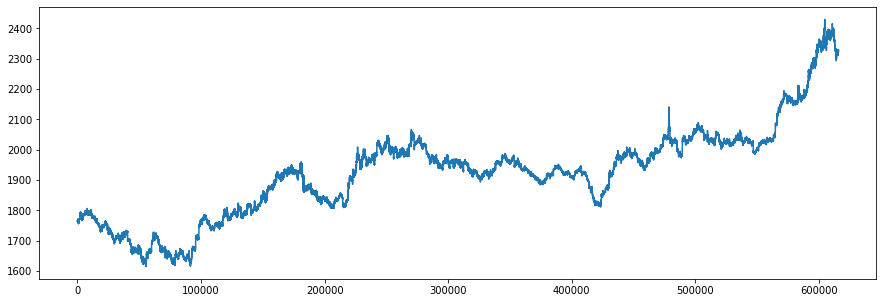

In [13]:
plt.figure(figsize=(15, 5))
plt.plot((df['Open'] + df['Close']) / 2)
plt.show()

# resistance and support 

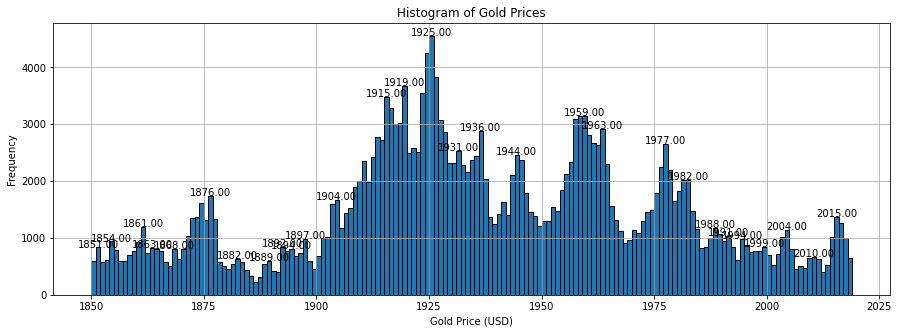

In [24]:
 plt.figure(figsize=(15,5))
price_of_gold = (df['Open'] + df['Close']) / 2
price_of_gold = price_of_gold[price_of_gold>1850]
price_of_gold = price_of_gold[price_of_gold<2020]
bin_width = 1
min_value = int(price_of_gold.min())  # Minimum value in the series
max_value = int(price_of_gold.max())  # Maximum value in the series
num_bins = int((max_value - min_value) / bin_width)

# Create a histogram
n, bins, patches = plt.hist(price_of_gold, bins=num_bins, range=(min_value, max_value), edgecolor='k')

# Customize the plot (add labels, title, etc.)
plt.xlabel('Gold Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Gold Prices')
plt.grid(True)
for i in range(1, len(n) - 2):
    if n[i] > n[i - 1] and n[i] > n[i + 1] and n[i] > n[i + 2]:
        plt.text(bins[i] + bin_width / 2, n[i] + 1, f'{bins[i]:.2f}', ha='center')

# Show the histogram
plt.show()

# candel size analize

In [26]:
candel_size = df['High'] - df['Low'] 

In [31]:
candel_size.size

440062

In [32]:
candel_size[candel_size > 3].size

1186

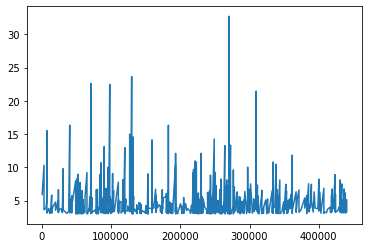

In [34]:
plt.plot(candel_size[candel_size > 3])

In [36]:
candel_size[candel_size > 3].size

1186